<a href="https://www.kaggle.com/code/danielr98/daniel-salary-analysis?scriptVersionId=239321918" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-analysis/Salary_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/salary-analysis/Salary_Data.csv')

In [3]:
df
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [4]:
# Impute missing salary based on the mean salary for each job title
df['Salary_Imputed_JobTitle'] = df.groupby('Job Title')['Salary'].transform(lambda x: x.fillna(x.mean()))

# Impute remaining missing values (if a job title had only missing salaries) with the overall mean
df['Salary_Imputed_JobTitle'] = df['Salary_Imputed_JobTitle'].fillna(df['Salary'].mean())
print("DataFrame with Salary imputed by Job Title mean:\n", df[['Job Title', 'Salary', 'Salary_Imputed_JobTitle']].head(10))

DataFrame with Salary imputed by Job Title mean:
                Job Title    Salary  Salary_Imputed_JobTitle
0      Software Engineer   90000.0                  90000.0
1           Data Analyst   65000.0                  65000.0
2         Senior Manager  150000.0                 150000.0
3        Sales Associate   60000.0                  60000.0
4               Director  200000.0                 200000.0
5      Marketing Analyst   55000.0                  55000.0
6        Product Manager  120000.0                 120000.0
7          Sales Manager   80000.0                  80000.0
8  Marketing Coordinator   45000.0                  45000.0
9       Senior Scientist  110000.0                 110000.0


In [5]:
df.shape
age_median = df['Age'].median()
salary_mean = df['Salary'].mean().round(0).astype(int)
print('age_median is:', int(age_median))
print('salary_mean is:', salary_mean)

age_median is: 32
salary_mean is: 115327


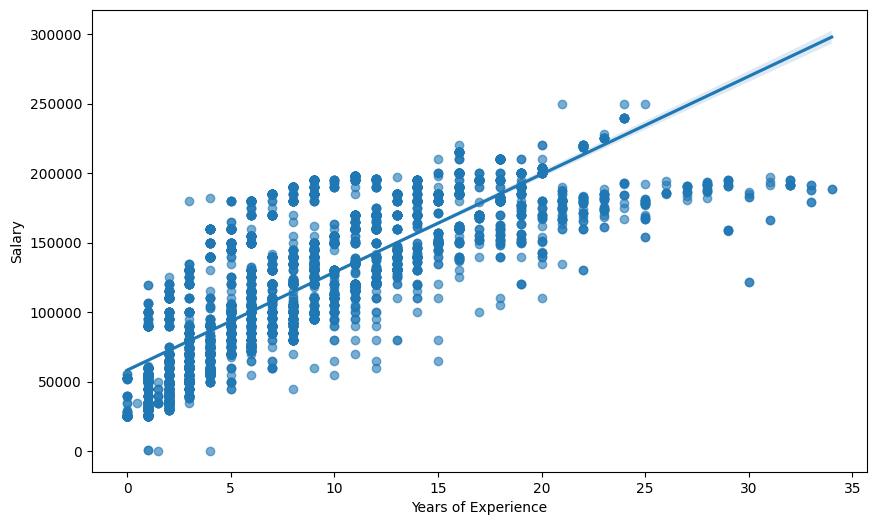

In [6]:
df.columns


plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.regplot(x='Years of Experience', y='Salary', data=df, scatter_kws={'alpha':0.6})


fig = px.scatter(df, x='Years of Experience', y='Salary',
                 title='Interactive Salary vs. Years of Experience',
                 trendline='ols')  # 'ols' adds an Ordinary Least Squares regression line

fig.update_layout(
    xaxis_title='Years of Experience',
    yaxis_title='Salary'
)



Average Salary by Years of Experience Group:
 Experience Group
0-5       63409.500623
6-10     120019.156892
11-15    153000.251577
16-20    179408.146409
20+      185621.750820
Name: Salary, dtype: float64


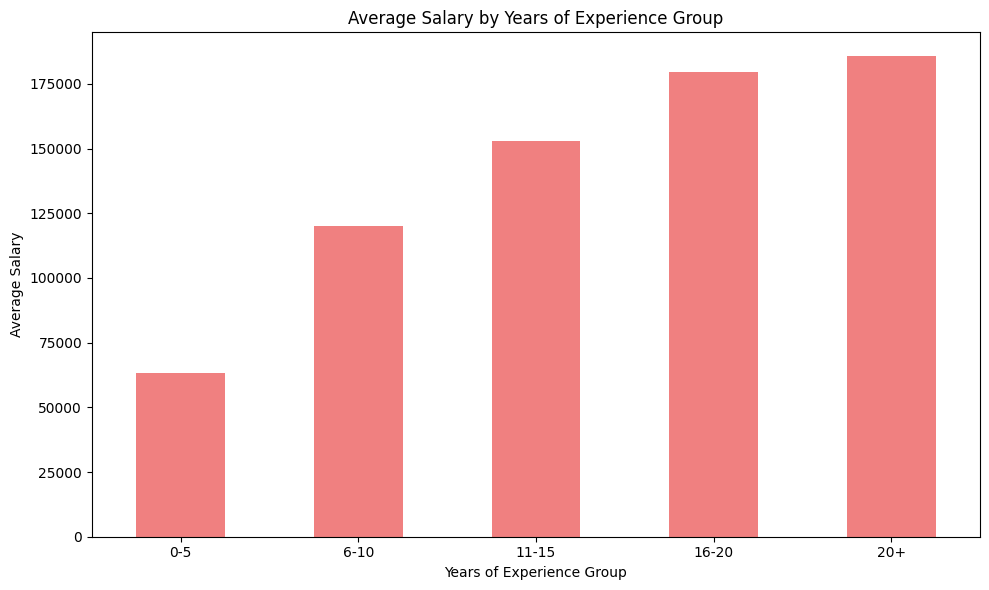

In [7]:
#
#### Calculate average salary of people that have worked 0-5, 6-10, 11-15 etc... years

bins = [0, 5, 10, 15, 20, float('inf')]  # Example bins: 0-5, 6-10, 11-15, 16-20, 20+
labels = ['0-5', '6-10', '11-15', '16-20', '20+']


# Create a new column that categorizes 'Years of Experience' into these bins
df['Experience Group'] = pd.cut(df['Years of Experience'], bins=bins, labels=labels, right=False)

# Calculate the average salary for each experience group
average_salary_by_experience = df.groupby('Experience Group', observed=True)['Salary'].mean().sort_values()

print("Average Salary by Years of Experience Group:\n", average_salary_by_experience)

# Visualize the results with a bar chart
plt.figure(figsize=(10, 6))
average_salary_by_experience.plot(kind='bar', color='lightcoral')
plt.xlabel('Years of Experience Group')
plt.ylabel('Average Salary')
plt.title('Average Salary by Years of Experience Group')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for these shorter labels
plt.tight_layout()
plt.show()

In [8]:
#find average pay of all unique job titles:
df.columns

average_salary_by_title = df.groupby('Job Title')['Salary'].mean()

# Find the job title with the highest average salary
highest_salary_job = average_salary_by_title.idxmax()  #Returns the index of the highest salary (the job name)
highest_average_salary = average_salary_by_title.max() #Returns the highest salary number 

print(f"Job Title with the Highest Average Salary: {highest_salary_job}, Average Salary: ${highest_average_salary:,.2f}")

# Find the job title with the lowest average salary
lowest_salary_job = average_salary_by_title.idxmin()
lowest_average_salary = average_salary_by_title.min()

print(f"Job Title with the Lowest Average Salary: {lowest_salary_job}, Average Salary: ${lowest_average_salary:,.2f}")


Job Title with the Highest Average Salary: CEO, Average Salary: $250,000.00
Job Title with the Lowest Average Salary: Junior Business Operations Analyst, Average Salary: $17,675.00


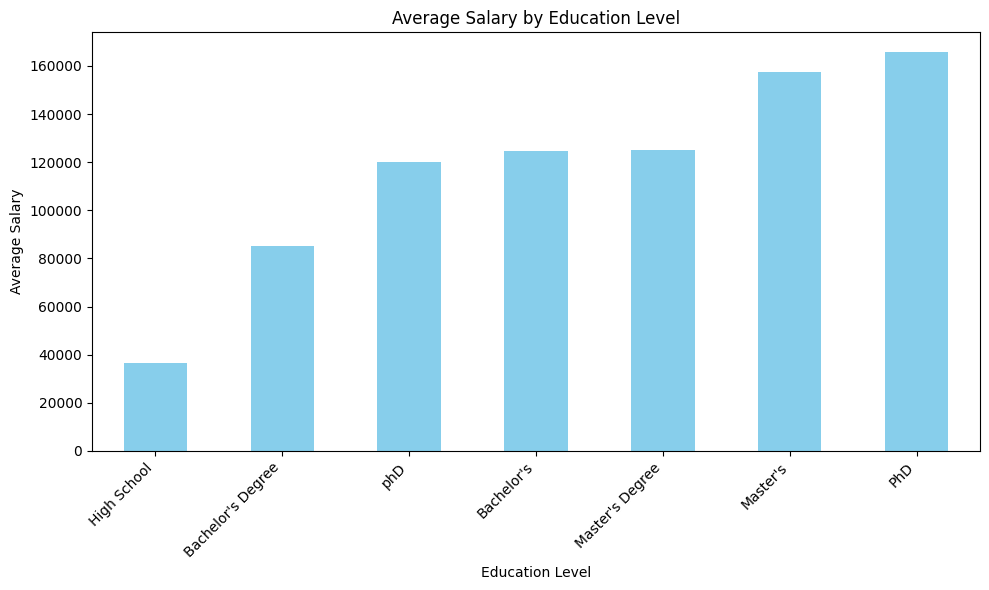

In [9]:
#Visualize the mean salary based on education level
average_salary_by_education = df.groupby('Education Level')['Salary'].mean().sort_values()
plt.figure(figsize=(10, 6))
average_salary_by_education.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

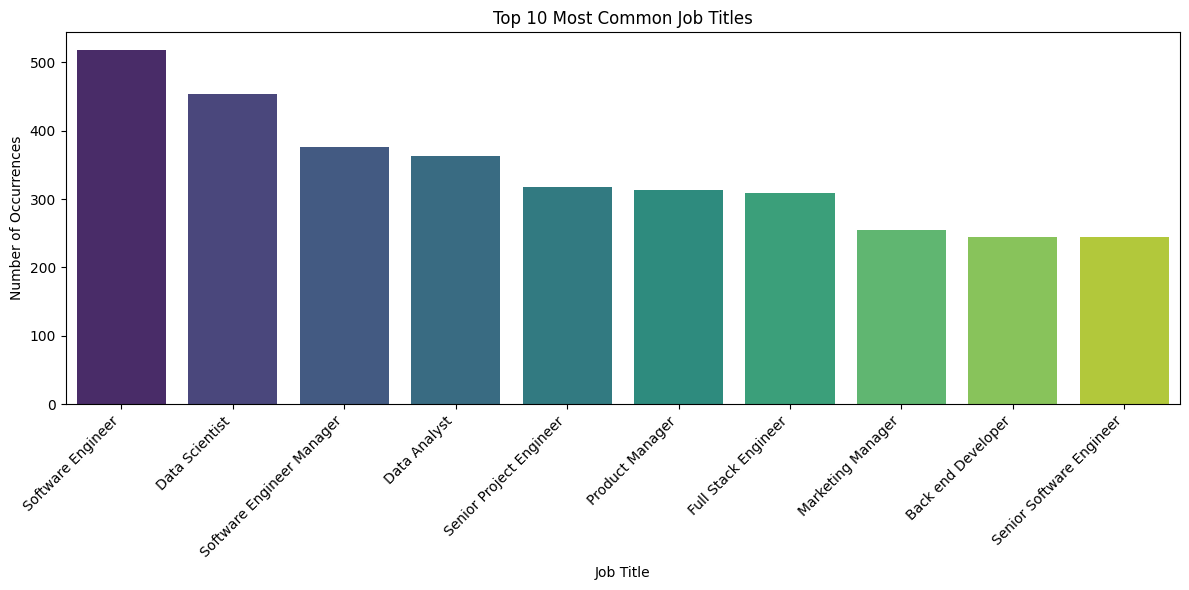

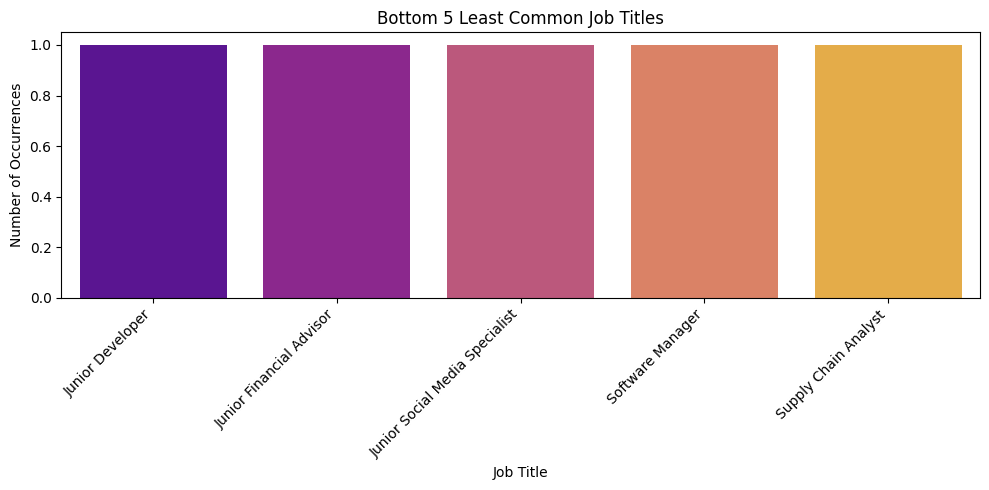

In [10]:
job_title_counts = df['Job Title'].value_counts().sort_values(ascending=False)


#Plot the most common and least common jobs:
# Visualize the top N most common job titles (adjust N as needed)
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.head(top_n).index, y=job_title_counts.head(top_n).values, palette='viridis') #x = job name, y = count
plt.xlabel('Job Title')
plt.ylabel('Number of Occurrences')
plt.title(f'Top {top_n} Most Common Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# If you want to see the least common ones:
bottom_n = 5
plt.figure(figsize=(10, 5))
sns.barplot(x=job_title_counts.tail(bottom_n).index, y=job_title_counts.tail(bottom_n).values, palette='plasma')
plt.xlabel('Job Title')
plt.ylabel('Number of Occurrences')
plt.title(f'Bottom {bottom_n} Least Common Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()